##  Downloading the Dataset
Scikit learn is used in loading the dataset, which is a database of 8x8 pictures ( 64 attributes)  of numbers having 1797 sample points in total. The dataset is imported as digits.

In [464]:
from sklearn.datasets import load_digits
digits = load_digits()

A description of the dataset is provided by the DESCR. The collection comprises photographs of handwritten digits divided into ten groups, each of which relates to a different digit (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). Let's use matplotlib to view the first image of the handwritten numbers contained in images.

<Figure size 432x288 with 0 Axes>

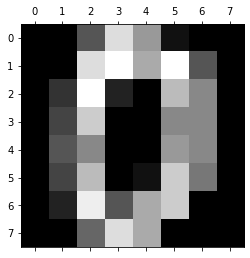

In [465]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [466]:

print('Digit:', digits.target[0])
print(digits.images[0])

Digit: 0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


The result will be a handwritten '0' on the screen.

Importing Libraries and Modules That Are Relevant After we've loaded our dataset, we'll begin coding by importing the train test split and performance metrics.

In [467]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [476]:
# Use reshape to flatten the array's structure
# -1 instructs NumPy to calculate the row size based on the length of the inner dimensions.

In [468]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

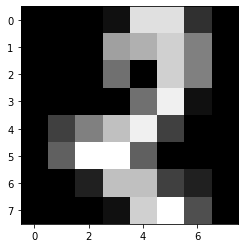

In [469]:
# Show a digit as an example
plt.imshow(digits.images[54])
plt.show()

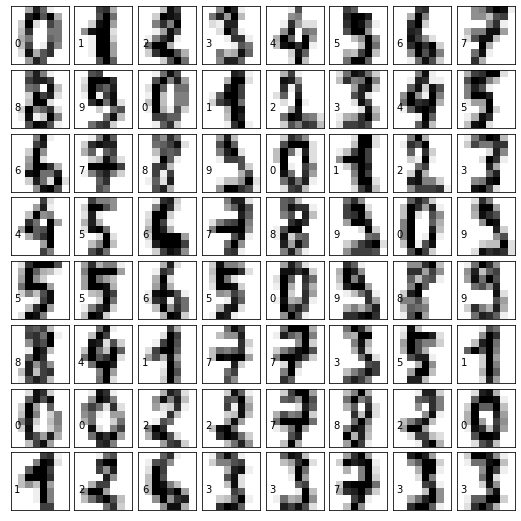

In [470]:
#  figure setup
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

# digits to be plotted: each picture is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # write the target value on the image
    ax.text(0, 5, str(digits.target[i]))

##  Data Preparation
Next, we'll prepare the data for training by defining a NumPy array data and reshaping it such that the first dimension is identical to the length of the photos, but with decreased dimensionality, and the second dimension is equal to the number of samples, n samples. As a result, the data dimension will be 1797 x 64.

##  Splitting Data into Train and Test
The next step is to split our data into 70 percent training and 30 percent testing using the train test split method.

In [471]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

## Classifiers
We'll utilise several algorithms as classifiers, generate predictions, and produce the 'Classification Report,' the 'Confusion Matrix,' and the 'Accuracy Score' once we've completed the aforementioned procedures.
The Classification Report will show us the precision, recall, f1-score, support, and accuracy of each Classifier, while the Confusion Matrix will show us the number of True Positives, False Positives, and False Negatives.

##  Baseline Machine Learning models: Classifiers with Default Hyperparameters

###  Gaussian Naive Bayes

In [388]:
from sklearn.naive_bayes import GaussianNB
import time
train_time = []
# making model
clf_NB = GaussianNB()
tick = time.time()
clf_NB.fit(X_train, y_train)
tock = time.time()
algo_time = tock - tick
print("Time taken for training a GaussianNB  = " + str(algo_time))
train_time.append(algo_time)
print(train_time)
print("Training set score: %f" % clf_NB.score(X_train, y_train))
print("Test set score: %f" % clf_NB.score(X_test, y_test))

Time taken for training a GaussianNB  = 0.017952442169189453
[0.017952442169189453]
Training set score: 0.877486
Test set score: 0.825926


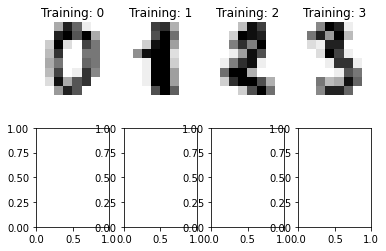

In [389]:
predicted = clf_NB.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [390]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540




C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0  2  0  0  0 52  1  1  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  2  0 45  7  0]
 [ 0 11  0  1  0  1  0  2 37  0]
 [ 1  1  0  1  0  5  0  6  1 40]]

Accuracy of the Algorithm:  0.825925925925926


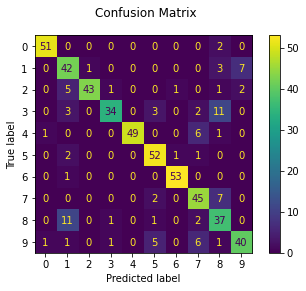

In [391]:
print("\nClassification report for classifier %s:\n%s\n" % (clf_NB, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(clf_NB, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", clf_NB.score(X_test, y_test))
plt.show()

### Support Vector Machines (SVM)

In [472]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
train_time = []
# making model
tick = time.time()
tock = time.time()
algo_time = tock - tick
print("Time taken for training a SVM  = " + str(algo_time))
train_time.append(algo_time)
print(train_time)
print("Training set score: %f" % svm_classifier.score(X_train, y_train))
print("Test set score: %f" % svm_classifier.score(X_test, y_test))

Time taken for training a SVM  = 0.0
[0.0]
Training set score: 0.996818
Test set score: 0.953704


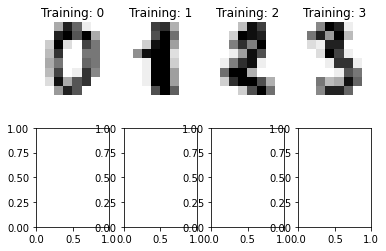

In [473]:
predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [394]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]

Accuracy of the Support Vector Machine:  0.9703703703703703


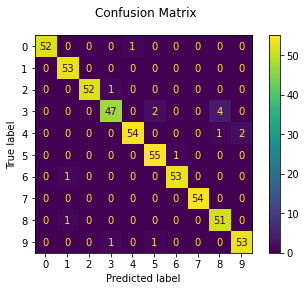

In [395]:
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Support Vector Machine: ", svm_classifier.score(X_test, y_test))
plt.show()

### Decision Trees

In [396]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
train_time = []
# making model
tick = time.time()
tock = time.time()
algo_time = tock - tick
print("Time taken for training a Decision Tree Classifier  = " + str(algo_time))
train_time.append(algo_time)
print(train_time)
print("Training set score: %f" % dt_classifier.score(X_train, y_train))
print("Test set score: %f" % dt_classifier.score(X_test, y_test))

Time taken for training a Decision Tree Classifier  = 0.0
[0.0]
Training set score: 1.000000
Test set score: 0.800000


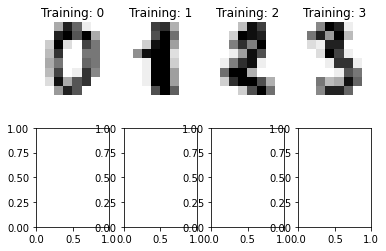

In [397]:
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [398]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.81      0.72      0.76        53
           2       0.80      0.74      0.76        53
           3       0.80      0.68      0.73        53
           4       0.76      0.82      0.79        57
           5       0.84      0.84      0.84        56
           6       0.83      0.80      0.81        54
           7       0.91      0.96      0.94        54
           8       0.81      0.75      0.78        52
           9       0.65      0.82      0.73        55

    accuracy                           0.80       540
   macro avg       0.80      0.80      0.80       540
weighted avg       0.80      0.80      0.80       540



Confusion matrix:
[[46  0  4  0  2  0  0  0  0  1]
 [ 0 38  2  1  0  0  1  0  2  9]
 [ 2  1 39  4  0  0  3  0  2  2]
 [ 0  1  3 36  0  5  0  1  2  5]
 [ 4  0  0  0 47  0  2  3

C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


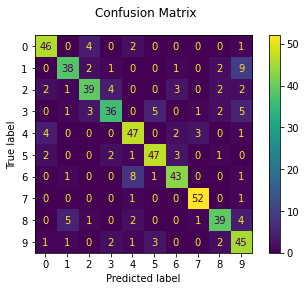

In [399]:
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()

###  Random Forest

In [400]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [401]:
train_time = []
# making model
tick = time.time()
tock = time.time()
algo_time = tock - tick
print("Time taken for training a Decision Tree Classifier  = " + str(algo_time))
train_time.append(algo_time)
print(train_time)
print("Training set score: %f" % RF_classifier.score(X_train, y_train))
print("Test set score: %f" % RF_classifier.score(X_test, y_test))

Time taken for training a Decision Tree Classifier  = 0.0
[0.0]
Training set score: 0.847255
Test set score: 0.785185


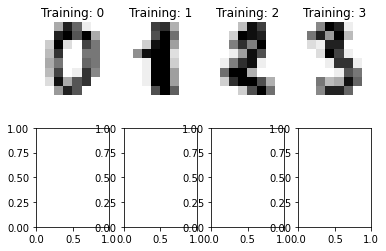

In [402]:
predicted = RF_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [403]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        53
           1       0.73      0.66      0.69        53
           2       0.79      0.77      0.78        53
           3       0.66      0.74      0.70        53
           4       0.88      0.81      0.84        57
           5       0.88      0.79      0.83        56
           6       0.85      0.98      0.91        54
           7       0.64      1.00      0.78        54
           8       0.94      0.31      0.46        52
           9       0.79      0.80      0.79        55

    accuracy                           0.79       540
   macro avg       0.80      0.78      0.77       540
weighted avg       0.80      0.79      0.77       540



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 1 35  1  2  2  1  0  5  0  6]
 [ 1  0 41  9  0  0  0  2  0  0]
 [ 0  1  6 39  0  2  0  4  1  0

C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




Accuracy of the Algorithm:  0.7851851851851852


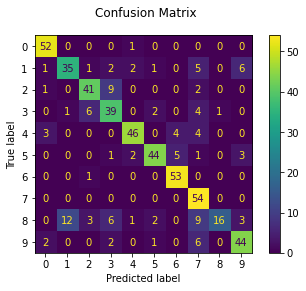

In [404]:
print("\nClassification report for classifier %s:\n%s\n" % (RF_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(RF_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", RF_classifier.score(X_test, y_test))
plt.show()

##  K Nearest Neighbours (KNN)

In [474]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [475]:
train_time = []
# making model
tick = time.time()
tock = time.time()
algo_time = tock - tick
print("Time taken for training a Decision Tree Classifier  = " + str(algo_time))
train_time.append(algo_time)
print(train_time)
print("Training set score: %f" % KNN_classifier.score(X_train, y_train))
print("Test set score: %f" % KNN_classifier.score(X_test, y_test))

Time taken for training a Decision Tree Classifier  = 0.0
[0.0]
Training set score: 0.991249
Test set score: 0.964815


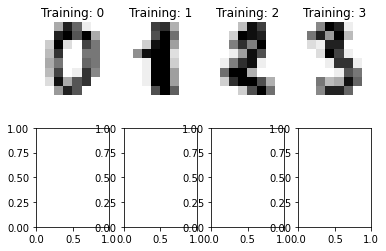

In [407]:
predicted = KNN_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [408]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540




C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 55  0  0  1  1  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  0  0  0  0  1 47  1]
 [ 0  0  0  1  0  2  0  0  0 52]]

Accuracy of the Algorithm:  0.9648148148148148


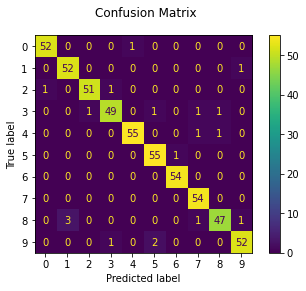

In [409]:
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))
plt.show()

#  Neural Network

In [410]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [411]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [412]:
# Reshape the images.
x_train = X_train.reshape
x_test = X_test.reshape

In [413]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [414]:
classifier = Sequential()

In [415]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [416]:
print(X_train.shape[1])

64


We start by defining the model by stacking layers with the correct dimensions, then we construct a loss function and connect it to the SGD optimizer, and last we feed the model training data for a set number of epochs.

In [436]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 10

model1 = Sequential()
model1.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model1.add(Dense(output_dim, activation="softmax"))

model1.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 1s 8ms/step - loss: 1.0057 - accuracy: 0.7264 - val_loss: 0.5660 - val_accuracy: 0.8690
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.9383 - val_loss: 0.3942 - val_accuracy: 0.9087
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9612 - val_loss: 0.3150 - val_accuracy: 0.9325
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9711 - val_loss: 0.2802 - val_accuracy: 0.9444
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9781 - val_loss: 0.2507 - val_accuracy: 0.9444
Epoch 6/15
32/32 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9881 - val_loss: 0.2330 - val_accuracy: 0.9484
Epoch 7/15
32/32 [==============================] - ETA: 0s - loss: 0.0971 - accuracy: 0.99 - 0s 5ms/step - loss: 0.0973 - accuracy: 0.9910 - val_loss: 0.2194 -

In [437]:
# Show the model.
model1.summary()

Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_336 (Dense)           (None, 100)               6500      
                                                                 
 dense_337 (Dense)           (None, 10)                1010      
                                                                 
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


In [438]:
# Save the metrics.
metrics = history1.history

In [439]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

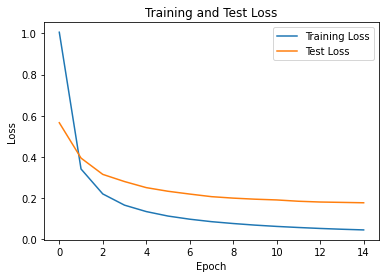

In [440]:
# Plot the training and test loss.
x = np.arange(0, 15, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [441]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

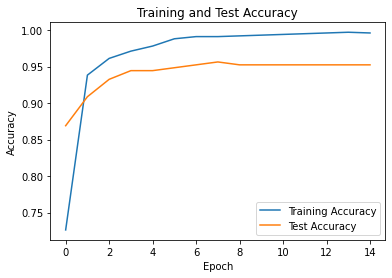

In [442]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

In [443]:
history1.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [444]:
history1.history

{'loss': [1.0056538581848145,
  0.3412630259990692,
  0.2200702428817749,
  0.16552072763442993,
  0.13436944782733917,
  0.11255946010351181,
  0.09730539470911026,
  0.08530595153570175,
  0.0762830302119255,
  0.06853947788476944,
  0.06222184747457504,
  0.0569782517850399,
  0.05232597514986992,
  0.04845533147454262,
  0.04521425813436508],
 'accuracy': [0.7263681888580322,
  0.9383084774017334,
  0.9611940383911133,
  0.9711442589759827,
  0.9781094789505005,
  0.9880596995353699,
  0.9910447597503662,
  0.9910447597503662,
  0.9920397996902466,
  0.993034839630127,
  0.9940298795700073,
  0.9950248599052429,
  0.9960198998451233,
  0.9970149397850037,
  0.9960198998451233],
 'val_loss': [0.56600421667099,
  0.39416584372520447,
  0.31502097845077515,
  0.2802203893661499,
  0.2507130801677704,
  0.23303331434726715,
  0.2194206267595291,
  0.20681257545948029,
  0.1996682733297348,
  0.19451072812080383,
  0.19087739288806915,
  0.18450532853603363,
  0.18075516819953918,
  0.1

In [445]:
import pandas as pd

history_df = pd.DataFrame(history1.history)
history_df["epoch"] = history1.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.005654,0.726368,0.566004,0.869048,0
1,0.341263,0.938308,0.394166,0.908730,1
2,0.220070,0.961194,0.315021,0.932540,2
3,0.165521,0.971144,0.280220,0.944444,3
4,0.134369,0.978109,0.250713,0.944444,4
5,0.112559,0.988060,0.233033,0.948413,5
6,0.097305,0.991045,0.219421,0.952381,6
7,0.085306,0.991045,0.206813,0.956349,7
8,0.076283,0.992040,0.199668,0.952381,8
9,0.068539,0.993035,0.194511,0.952381,9


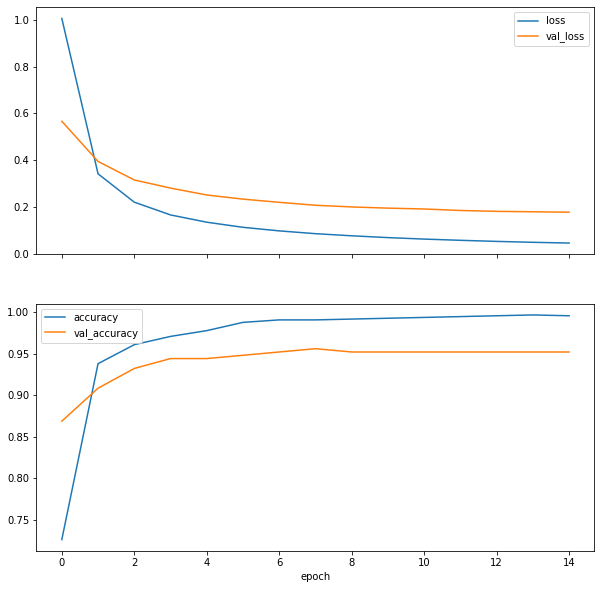

In [446]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# Two Hidden layers

In [451]:
model2 = Sequential()
model2.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model2.add(Dense(output_dim, activation="tanh"))
Dropout(0.0)
model2.add(Dense(output_dim, activation="softmax"))

model2.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
32/32 [==============================] - 1s 10ms/step - loss: 1.4364 - accuracy: 0.6179 - val_loss: 0.9745 - val_accuracy: 0.8413
Epoch 2/15
32/32 [==============================] - 0s 4ms/step - loss: 0.7602 - accuracy: 0.8985 - val_loss: 0.6751 - val_accuracy: 0.9048
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.9383 - val_loss: 0.5116 - val_accuracy: 0.9325
Epoch 4/15
32/32 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.9632 - val_loss: 0.4235 - val_accuracy: 0.9405
Epoch 5/15
32/32 [==============================] - 0s 4ms/step - loss: 0.2904 - accuracy: 0.9791 - val_loss: 0.3648 - val_accuracy: 0.9484
Epoch 6/15
32/32 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9851 - val_loss: 0.3300 - val_accuracy: 0.9444
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9881 - val_loss: 0.2982 - val_accuracy: 0.9444
Epoch 8/15
32/32 [=

In [112]:
# Show the model.
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               6500      
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 17,610
Trainable params: 17,610
Non-trainable params: 0
_________________________________________________________________


In [113]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.9148
Test Accuracy: 0.914814829826355
Test Loss: 0.34553274512290955


In [114]:
# Save the metrics.
metrics = history2.history

In [115]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

In [116]:
import pandas as pd

history_df1 = pd.DataFrame(history2.history)
history_df1["epoch"] = history1.epoch
history_df1

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.914659,0.789055,0.481110,0.904762,0
1,0.269801,0.959204,0.329026,0.928571,1
2,0.170308,0.973134,0.273386,0.936508,2
3,0.124929,0.981095,0.247186,0.936508,3
4,0.098475,0.985075,0.225100,0.940476,4
5,0.080111,0.990050,0.204499,0.944444,5
6,0.066617,0.993035,0.193866,0.956349,6
7,0.057775,0.996020,0.184445,0.956349,7
8,0.049672,0.997015,0.181337,0.960317,8
9,0.043481,0.998010,0.175415,0.956349,9


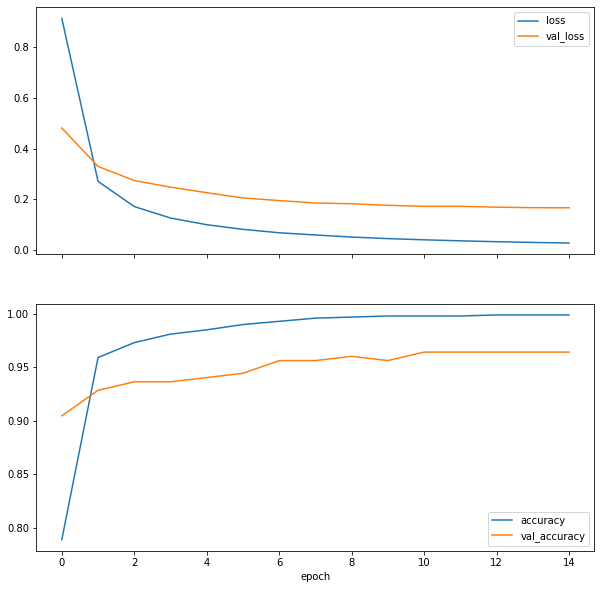

In [117]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df1.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df1.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# Four Hidden layers

In [460]:
# learning rate to 0.01
model22 = Sequential()
model22.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model22.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model22.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model22.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model22.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.0)
model22.add(Dense(output_dim, activation="softmax"))
model22.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history22 = model22.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 1s 11ms/step - loss: 0.8760 - accuracy: 0.8010 - val_loss: 0.4428 - val_accuracy: 0.9048
Epoch 2/15
32/32 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.9652 - val_loss: 0.2514 - val_accuracy: 0.9444
Epoch 3/15
32/32 [==============================] - 0s 5ms/step - loss: 0.1269 - accuracy: 0.9821 - val_loss: 0.1881 - val_accuracy: 0.9603
Epoch 4/15
32/32 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9930 - val_loss: 0.1616 - val_accuracy: 0.9563
Epoch 5/15
32/32 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9950 - val_loss: 0.1494 - val_accuracy: 0.9643
Epoch 6/15
32/32 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9970 - val_loss: 0.1501 - val_accuracy: 0.9563
Epoch 7/15
32/32 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9990 - val_loss: 0.1653 - val_accuracy: 0.9563
Epoch 8/15
32/32 [=

In [461]:
test_loss, test_accuracy = model22.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.9167
Test Accuracy: 0.9166666865348816
Test Loss: 0.36486461758613586


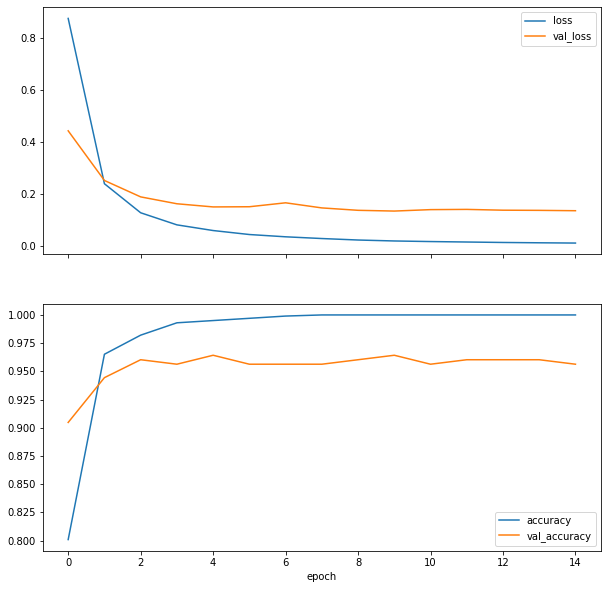

In [462]:
import pandas as pd

history_df22 = pd.DataFrame(history22.history)
history_df22["epoch"] = history22.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df22.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df22.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

#   Tuning Hyperparameters

### Learning rate

In [124]:
from tensorflow.keras.optimizers import SGD

In [128]:
# Decreasing the learning rate to 0.005
model3 = Sequential()
model3.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model3.add(Dense(output_dim, activation="softmax"))

model3.compile(optimizer=optimizers.SGD(lr=0.005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 1s 6ms/step - loss: 2.3618 - accuracy: 0.1333 - val_loss: 2.2092 - val_accuracy: 0.2103
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 1.9807 - accuracy: 0.3274 - val_loss: 1.8996 - val_accuracy: 0.3690
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 1.6852 - accuracy: 0.5264 - val_loss: 1.6574 - val_accuracy: 0.5079
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 1.4562 - accuracy: 0.6269 - val_loss: 1.4683 - val_accuracy: 0.5833
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 1.2789 - accuracy: 0.6965 - val_loss: 1.3189 - val_accuracy: 0.6429
Epoch 6/15
32/32 [==============================] - 0s 3ms/step - loss: 1.1391 - accuracy: 0.7403 - val_loss: 1.2004 - val_accuracy: 0.6905
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 1.0276 - accuracy: 0.7622 - val_loss: 1.1034 - val_accuracy: 0.7262
Epoch 8/15
32/32 [==

In [130]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 3ms/step - loss: 0.7731 - accuracy: 0.7981
Test Accuracy: 0.7981481552124023
Test Loss: 0.7730602622032166


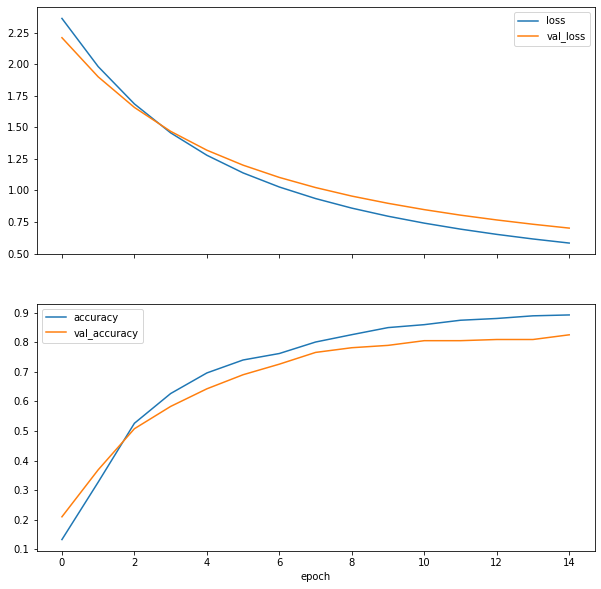

In [131]:
import pandas as pd

history_df3 = pd.DataFrame(history3.history)
history_df3["epoch"] = history3.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df3.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df3.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [134]:
# Increasing the learning rate to 1
model4 = Sequential()
model4.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model4.add(Dense(output_dim, activation="softmax"))

model4.compile(optimizer=optimizers.SGD(lr=1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 1s 7ms/step - loss: 0.3690 - accuracy: 0.8846 - val_loss: 0.1942 - val_accuracy: 0.9484
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9781 - val_loss: 0.1856 - val_accuracy: 0.9563
Epoch 3/15
32/32 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9940 - val_loss: 0.1679 - val_accuracy: 0.9484
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9990 - val_loss: 0.1639 - val_accuracy: 0.9563
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.1722 - val_accuracy: 0.9524
Epoch 6/15
32/32 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9563
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1705 - val_accuracy: 0.9524
Epoch 8/15
32/32 [==

In [136]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.9093
Test Accuracy: 0.9092592597007751
Test Loss: 0.3754342198371887


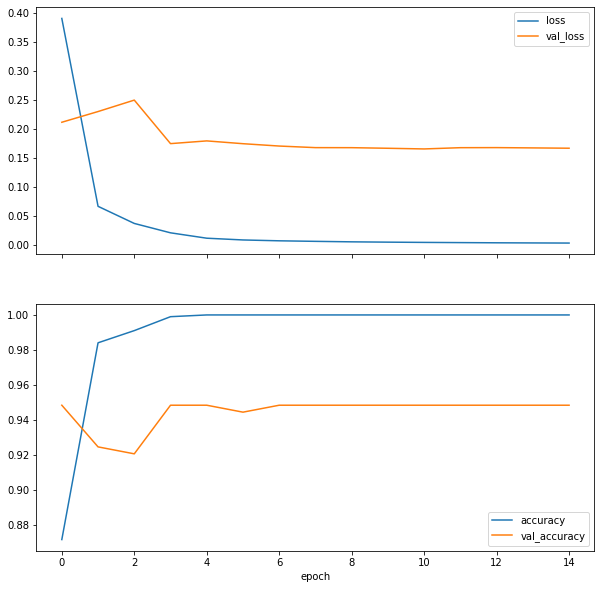

In [137]:
import pandas as pd

history_df3 = pd.DataFrame(history3.history)
history_df3["epoch"] = history3.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df3.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df3.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### Batch size

In [166]:
model5 = Sequential()
model5.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model5.add(Dense(output_dim, activation="softmax"))

model5.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])

history5 = model5.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)

Epoch 1/15
16/16 [==============================] - 0s 12ms/step - loss: 2.4175 - accuracy: 0.1104 - val_loss: 2.1973 - val_accuracy: 0.2579
Epoch 2/15
16/16 [==============================] - 0s 4ms/step - loss: 2.0157 - accuracy: 0.2866 - val_loss: 1.8647 - val_accuracy: 0.3889
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 1.7017 - accuracy: 0.4617 - val_loss: 1.6066 - val_accuracy: 0.4960
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 1.4571 - accuracy: 0.5990 - val_loss: 1.4071 - val_accuracy: 0.6190
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 1.2673 - accuracy: 0.6776 - val_loss: 1.2523 - val_accuracy: 0.6786
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 1.1182 - accuracy: 0.7502 - val_loss: 1.1300 - val_accuracy: 0.7302
Epoch 7/15
16/16 [==============================] - 0s 4ms/step - loss: 0.9996 - accuracy: 0.7940 - val_loss: 1.0322 - val_accuracy: 0.7738
Epoch 8/15
16/16 [=

In [167]:
test_loss, test_accuracy = model5.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.8519
Test Accuracy: 0.8518518805503845
Test Loss: 0.6966077089309692


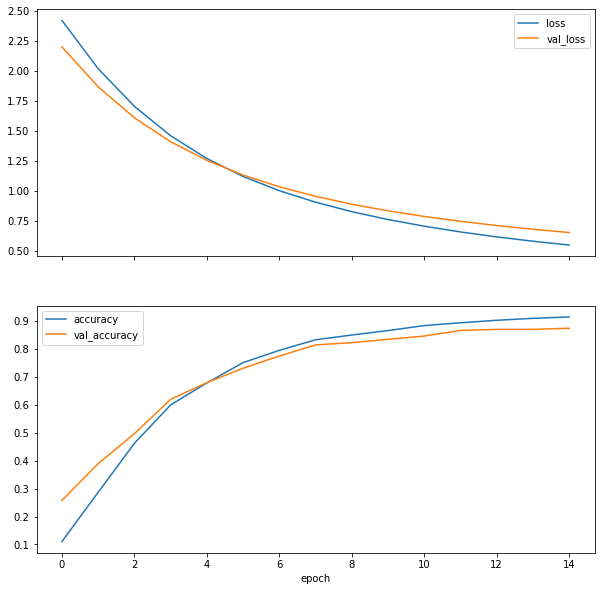

In [181]:
import pandas as pd

history_df5 = pd.DataFrame(history5.history)
history_df5["epoch"] = history3.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df5.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df5.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### Activation Function

In [177]:
model6 = Sequential()
model6.add(Dense(hidden_dim, input_dim=input_dim, activation="ReLU"))
model6.add(Dense(output_dim, activation="softmax"))

model6.compile(optimizer=optimizers.SGD(lr=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

history6 = model6.fit(X_train, y_train, validation_split=0.2, epochs= 15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 1s 9ms/step - loss: 2.5749 - accuracy: 0.0796 - val_loss: 2.5955 - val_accuracy: 0.0357
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 2.5064 - accuracy: 0.0915 - val_loss: 2.5290 - val_accuracy: 0.0556
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 2.4401 - accuracy: 0.1085 - val_loss: 2.4654 - val_accuracy: 0.0675
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 2.3770 - accuracy: 0.1214 - val_loss: 2.4039 - val_accuracy: 0.0794
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 2.3158 - accuracy: 0.1363 - val_loss: 2.3449 - val_accuracy: 0.0952
Epoch 6/15
32/32 [==============================] - 0s 2ms/step - loss: 2.2568 - accuracy: 0.1562 - val_loss: 2.2876 - val_accuracy: 0.1111
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 2.1997 - accuracy: 0.1841 - val_loss: 2.2324 - val_accuracy: 0.1190
Epoch 8/15
32/32 [==

In [178]:
test_loss, test_accuracy = model6.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 3ms/step - loss: 1.9280 - accuracy: 0.3611
Test Accuracy: 0.3611111044883728
Test Loss: 1.9279545545578003


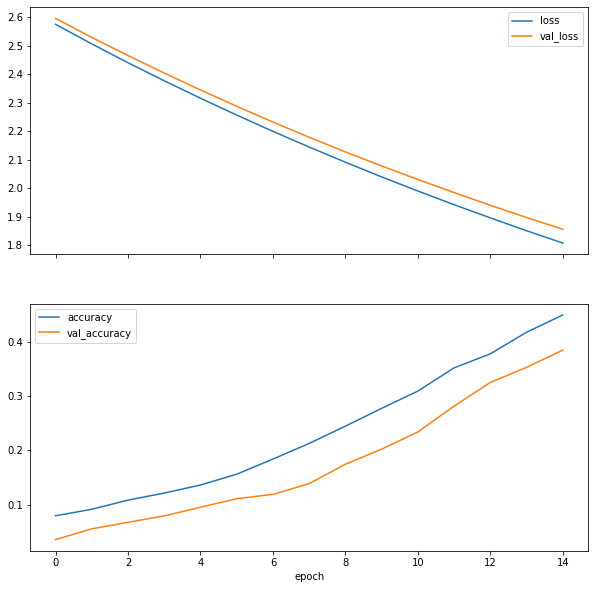

In [180]:
import pandas as pd

history_df6 = pd.DataFrame(history6.history)
history_df6["epoch"] = history6.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df6.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df6.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/3643041528.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.626889 using {'optimizer': 'SGD'}
0.626889 (0.026457) with: {'optimizer': 'SGD'}
0.554495 (0.056388) with: {'optimizer': 'RMSprop'}
0.559268 (0.009613) with: {'optimizer': 'Adagrad'}
0.552108 (0.042974) with: {'optimizer': 'tanh'}
0.584726 (0.014052) with: {'optimizer': 'Adadelta'}
0.550517 (0.038500) with: {'optimizer': 'Adam'}
0.604614 (0.036681) with: {'optimizer': 'Adamax'}
0.531424 (0.016226) with: {'optimizer': 'Nadam'}


##  DROPOUT

In [188]:
model7 = Sequential()
model7.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
Dropout(0.5)
model7.add(Dense(output_dim, activation="tanh"))
Dropout(0.5)
model7.add(Dense(output_dim, activation="softmax"))
model7.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])

history7 = model7.fit(X_train, y_train, validation_split=0.2, epochs= 15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 1s 8ms/step - loss: 2.2336 - accuracy: 0.1871 - val_loss: 2.0308 - val_accuracy: 0.2540
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 1.8765 - accuracy: 0.3662 - val_loss: 1.7727 - val_accuracy: 0.4127
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 1.6678 - accuracy: 0.5124 - val_loss: 1.6057 - val_accuracy: 0.5198
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 1.5246 - accuracy: 0.5851 - val_loss: 1.4815 - val_accuracy: 0.5992
Epoch 5/15
32/32 [==============================] - 0s 4ms/step - loss: 1.4139 - accuracy: 0.6388 - val_loss: 1.3867 - val_accuracy: 0.6389
Epoch 6/15
32/32 [==============================] - 0s 4ms/step - loss: 1.3228 - accuracy: 0.6746 - val_loss: 1.3066 - val_accuracy: 0.6825
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 1.2434 - accuracy: 0.7164 - val_loss: 1.2381 - val_accuracy: 0.7302
Epoch 8/15
32/32 [==

In [189]:
test_loss, test_accuracy = model7.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.7796
Test Accuracy: 0.779629647731781
Test Loss: 0.9866474270820618


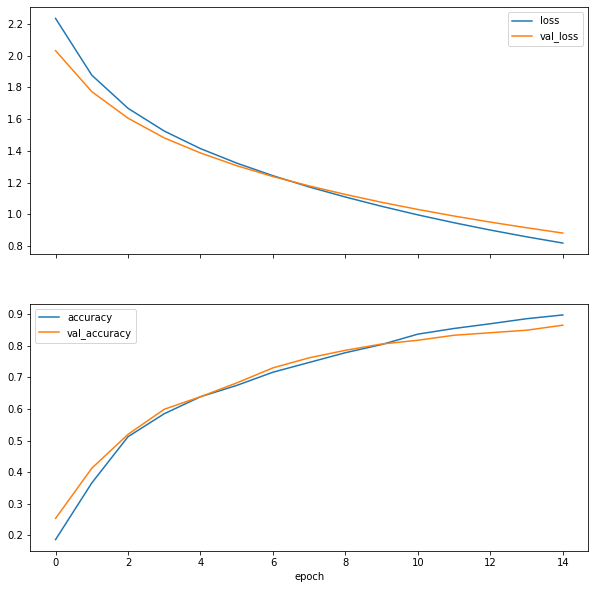

In [190]:
import pandas as pd

history_df7 = pd.DataFrame(history7.history)
history_df7["epoch"] = history7.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df7.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df7.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

#  Grid Search

##  Tunning Training Optimization Algorithm

In [259]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model



model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad','tanh', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/4019285425.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
C:\Users\charl\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Best: 0.884646 using {'optimizer': 'SGD'}
0.884646 (0.033147) with: {'optimizer': 'SGD'}
0.881464 (0.026457) with: {'optimizer': 'RMSprop'}
0.869531 (0.033204) with: {'optimizer': 'Adagrad'}
0.875895 (0.032197) with: {'optimizer': 'tanh'}
0.876691 (0.031502) with: {'optimizer': 'Adadelta'}
0.876691 (0.025950) with: {'optimizer': 'Adam'}
0.879873 (0.036836) with: {'optimizer': 'Adamax'}
0.879077 (0.033545) with: {'optimizer': 'Nadam'}


##  Tuning Batch Size and Number of Epochs

In [311]:
def create_model():
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model


model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
# define the grid search parameters
batch_size = [20,32, 40, 60,64, 80, 100]
epochs = [5,10,15,20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/59640187.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.898966 using {'batch_size': 20, 'epochs': 20}
0.831344 (0.030585) with: {'batch_size': 20, 'epochs': 5}
0.882259 (0.022836) with: {'batch_size': 20, 'epochs': 10}
0.894988 (0.030934) with: {'batch_size': 20, 'epochs': 15}
0.898966 (0.025877) with: {'batch_size': 20, 'epochs': 20}
0.806683 (0.015467) with: {'batch_size': 32, 'epochs': 5}
0.854415 (0.045576) with: {'batch_size': 32, 'epochs': 10}
0.871917 (0.016343) with: {'batch_size': 32, 'epochs': 15}
0.886237 (0.032452) with: {'batch_size': 32, 'epochs': 20}
0.773270 (0.021435) with: {'batch_size': 40, 'epochs': 5}
0.828958 (0.023573) with: {'batch_size': 40, 'epochs': 10}
0.858393 (0.034051) with: {'batch_size': 40, 'epochs': 15}
0.863166 (0.030955) with: {'batch_size': 40, 'epochs': 20}
0.683373 (0.036002) with: {'batch_size': 60, 'epochs': 5}
0.832140 (0.011418) with: {'batch_size': 60, 'epochs': 10}
0.855211 (0.023573) with: {'batch_size': 60, 'epochs': 15}
0.866348 (0.032432) with: {'batch_size': 60, 'epochs': 20}
0.6905

## Tuning Learning rate and Momentum

In [243]:
def create_model(learn_rate=0.01, momentum=0):
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model


model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/3526185531.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.894193 using {'learn_rate': 0.2, 'momentum': 0.0}
0.879077 (0.015136) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.879873 (0.031077) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.864757 (0.027650) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.882259 (0.008787) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.870326 (0.037803) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.879873 (0.036836) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.876691 (0.026457) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.868735 (0.038335) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.887828 (0.012169) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.862371 (0.029317) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.889419 (0.031502) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.877486 (0.027305) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.880668 (0.022473) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.870326 (0.023492) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.879077 (0.035364) with: {'learn_rate': 0

## Tuning Network Weight Initialization

In [246]:
def create_model(init_mode='uniform'):
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model


model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
# define the grid search parameters
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/1956556208.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.894193 using {'init_mode': 'uniform'}
0.894193 (0.029317) with: {'init_mode': 'uniform'}
0.876691 (0.020469) with: {'init_mode': 'lecun_uniform'}
0.880668 (0.028838) with: {'init_mode': 'normal'}
0.879873 (0.015751) with: {'init_mode': 'zero'}
0.880668 (0.028706) with: {'init_mode': 'glorot_normal'}
0.871917 (0.029830) with: {'init_mode': 'glorot_uniform'}
0.885442 (0.035720) with: {'init_mode': 'he_normal'}
0.876691 (0.028728) with: {'init_mode': 'he_uniform'}


##  Tuning the Neuron Activation Function

In [247]:
def create_model(activation='relu'):
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model


model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/844166590.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.895784 using {'activation': 'relu'}
0.882259 (0.021018) with: {'activation': 'softmax'}
0.871917 (0.029957) with: {'activation': 'softplus'}
0.871122 (0.041246) with: {'activation': 'softsign'}
0.895784 (0.019519) with: {'activation': 'relu'}
0.894193 (0.033545) with: {'activation': 'tanh'}
0.862371 (0.034328) with: {'activation': 'sigmoid'}
0.879077 (0.035364) with: {'activation': 'hard_sigmoid'}
0.888624 (0.021729) with: {'activation': 'linear'}


##  Tuning Dropout Regularization and weight

In [249]:
def create_model(dropout_rate=0.0, weight_constraint=0):
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model


model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/2583812316.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.894988 using {'dropout_rate': 0.0, 'weight_constraint': 2}
0.876691 (0.024828) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.894988 (0.039119) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.875099 (0.025877) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.867144 (0.040984) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.885442 (0.027282) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.867144 (0.025729) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.874304 (0.032743) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.879873 (0.039761) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.886237 (0.022161) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.874304 (0.037450) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.887033 (0.019225) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.879873 (0.025132) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.877486 (0.029575) with: {'dropout_rate': 0.2, 'weight_constraint': 

##  Tuning the Number of Neurons in the Hidden Layer

In [254]:
def create_model(neurons=1):
# create model
model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))
# Compile model
model.compile(optimizer=optimizers.SGD(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
return model


model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)
neurons = [1,2,3,4, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\charl\AppData\Local\Temp/ipykernel_12304/447250530.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32, verbose=0)


Best: 0.887828 using {'neurons': 3}
0.878282 (0.027282) with: {'neurons': 1}
0.884646 (0.034659) with: {'neurons': 2}
0.887828 (0.018589) with: {'neurons': 3}
0.882259 (0.028395) with: {'neurons': 4}
0.875895 (0.027627) with: {'neurons': 5}
0.877486 (0.021903) with: {'neurons': 10}
0.887033 (0.015751) with: {'neurons': 15}
0.876691 (0.034877) with: {'neurons': 20}
0.878282 (0.020623) with: {'neurons': 25}
0.876691 (0.023411) with: {'neurons': 30}


## Model with the best hyperparamters

In [310]:
# Initialising the ANN
model_best = Sequential()

# Adding the input layer and the first hidden layer
model_best.add(Dense(hidden_dim ,kernel_initializer = 'uniform',activation='relu',input_dim = input_dim))
Dropout(0.0)
# Adding the second hidden layer
model_best.add(Dense(hidden_dim, kernel_initializer = 'uniform',activation='relu',input_dim = input_dim))
Dropout(0.0)            
# Adding the third hidden layer
model_best.add(Dense(hidden_dim, kernel_initializer = 'uniform',activation='relu',input_dim = input_dim)) 
Dropout(0.0)
# Adding the output layer
model_best.add(Dense(output_dim, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
model_best.compile(optimizer=optimizers.SGD(lr=0.2),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
history10 = model_best.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=20)

Epoch 1/20
51/51 [==============================] - 1s 6ms/step - loss: 2.3042 - accuracy: 0.1045 - val_loss: 2.3004 - val_accuracy: 0.0992
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 2.2994 - accuracy: 0.1194 - val_loss: 2.2906 - val_accuracy: 0.1190
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 2.2578 - accuracy: 0.1881 - val_loss: 2.1244 - val_accuracy: 0.4167
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 1.4628 - accuracy: 0.5274 - val_loss: 1.0786 - val_accuracy: 0.5357
Epoch 5/20
51/51 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.8169 - val_loss: 0.5897 - val_accuracy: 0.7857
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9353 - val_loss: 1.5889 - val_accuracy: 0.7460
Epoch 7/20
51/51 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9522 - val_loss: 0.3122 - val_accuracy: 0.8889
Epoch 8/20
51/51 [==

In [304]:
test_loss, test_accuracy = model_best.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

17/17 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.9000
Test Accuracy: 0.8999999761581421
Test Loss: 0.6462266445159912


In [312]:
# Save the metrics.
metrics1 = history10.history

# Save the loss values.
training_loss_list = metrics1['loss']
test_loss_list = metrics1['val_loss']

history_df10 = pd.DataFrame(history10.history)
history_df10["epoch"] = history10.epoch
history_df10

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.304212,0.104478,2.300415,0.099206,0
1,2.299419,0.119403,2.290569,0.119048,1
2,2.257760,0.188060,2.124387,0.416667,2
3,1.462765,0.527363,1.078589,0.535714,3
4,0.545967,0.816915,0.589656,0.785714,4
5,0.215226,0.935323,1.588909,0.746032,5
6,0.214503,0.952239,0.312237,0.888889,6
7,0.073173,0.981095,0.530645,0.837302,7
8,0.039047,0.989055,0.215586,0.936508,8
9,0.015886,0.998010,0.245052,0.936508,9


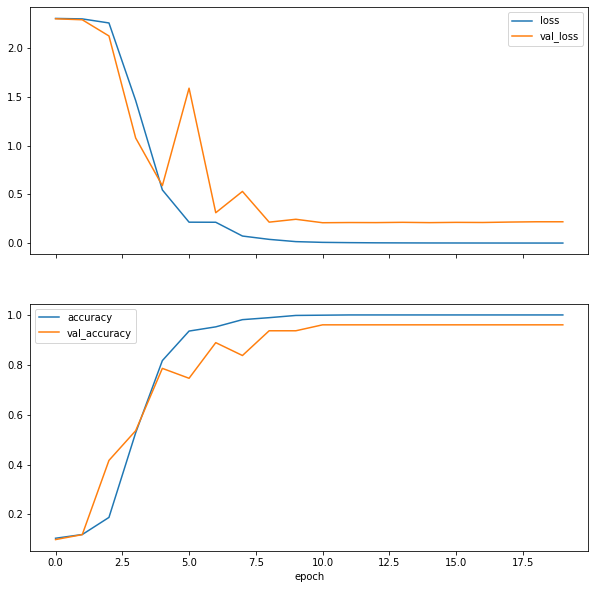

In [313]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
history_df10.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df10.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [336]:
prediction_values = model_best.predict(X_test)

In [338]:
print("Evaluating on training set...")
(loss, accuracy) = model_best.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model_best.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0449, accuracy: 99.2045%
Evaluating on testing set...
loss=0.6571, accuracy: 91.8519%


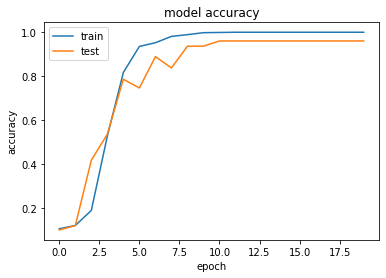

In [340]:
# summarize history for accuracy
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])